In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
# Load the data
email_table = pd.read_csv('data/email_table.csv')
email_opened_table = pd.read_csv('data/email_opened_table.csv')
link_clicked_table = pd.read_csv('data/link_clicked_table.csv')

# Display the first 5 rows of each table to understand structure
print("Email Table Preview:")
print(email_table.head())
print("------------------------------------------------------------------")
print("\nEmail Opened Table Preview:")
print(email_opened_table.head())
print("------------------------------------------------------------------")
print("\nLink Clicked Table Preview:")
print(link_clicked_table.head())

Email Table Preview:
   email_id   email_text email_version  hour    weekday user_country  \
0     85120  short_email  personalized     2     Sunday           US   
1    966622   long_email  personalized    12     Sunday           UK   
2    777221   long_email  personalized    11  Wednesday           US   
3    493711  short_email       generic     6     Monday           UK   
4    106887   long_email       generic    14     Monday           US   

   user_past_purchases  
0                    5  
1                    2  
2                    2  
3                    1  
4                    6  
------------------------------------------------------------------

Email Opened Table Preview:
   email_id
0    284534
1    609056
2    220820
3    905936
4    164034
------------------------------------------------------------------

Link Clicked Table Preview:
   email_id
0    609056
1    870980
2    935124
3    158501
4    177561


In [34]:
print("Shape of email_table : ",email_table.shape)
print("Shape of email_opened_table : ",email_opened_table.shape)
print("Shape of link_clicked_table : ",link_clicked_table.shape)

Shape of email_table :  (100000, 7)
Shape of email_opened_table :  (10345, 1)
Shape of link_clicked_table :  (2119, 1)


In [35]:
# Creating binary indicators for opened and clicked emails
email_table['opened'] = email_table['email_id'].isin(email_opened_table['email_id']).astype(int)
email_table['clicked'] = email_table['email_id'].isin(link_clicked_table['email_id']).astype(int)

In [36]:
email_table['opened'].value_counts()

opened
0    89655
1    10345
Name: count, dtype: int64

In [37]:
email_table['clicked'].value_counts()

clicked
0    97881
1     2119
Name: count, dtype: int64

In [38]:
# Ensuring all emails in clicked are also in opened (data consistency check)
clicked_not_opened = email_table[(email_table['clicked'] == 1) & (email_table['opened'] == 0)]
if len(clicked_not_opened) > 0:
    print(f"Warning: {len(clicked_not_opened)} emails were clicked but not marked as opened.")

In [39]:
# Fixing data inconsistency by marking clicked email as opened
email_table.loc[email_table['clicked'] == 1, 'opened'] = 1

In [40]:
# Now this code should not print any warnings as we have fixed the inconsistency in the above cell
clicked_not_opened = email_table[(email_table['clicked'] == 1) & (email_table['opened'] == 0)]
if len(clicked_not_opened) > 0:
    print(f"Warning: {len(clicked_not_opened)} emails were clicked but not marked as opened.")

Insights :
Dataset shows that some link has been clicked by the customer but it was not opened by them, so this was the case of data inconistency. Fixed it by marking clicked email as opened

In [41]:
# Check for missing values
print("Missing values in email_table:")
print(email_table.isnull().sum())

print("--------------------------------------------------------------")

# Check data types
print("\nData types in email_table:")
print(email_table.dtypes)

Missing values in email_table:
email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
opened                 0
clicked                0
dtype: int64
--------------------------------------------------------------

Data types in email_table:
email_id                int64
email_text             object
email_version          object
hour                    int64
weekday                object
user_country           object
user_past_purchases     int64
opened                  int64
clicked                 int64
dtype: object


Insights :
1. Dataset has 0 missing values
2. It has numerical as well as categorical columns

In [42]:
# Basic statistics using describe()
print("Basic statistics for numerical columns:")
print(email_table.describe())

print("--------------------------------------------------------------")

# Concise summary of the DataFrame using info()
print("\nConcise summary of email_table:")
print(email_table.info())

Basic statistics for numerical columns:
            email_id           hour  user_past_purchases         opened  \
count  100000.000000  100000.000000         100000.00000  100000.000000   
mean   498690.196160       9.059300              3.87845       0.103950   
std    289230.727534       4.439637              3.19611       0.305197   
min         8.000000       1.000000              0.00000       0.000000   
25%    246708.250000       6.000000              1.00000       0.000000   
50%    498447.000000       9.000000              3.00000       0.000000   
75%    749942.750000      12.000000              6.00000       0.000000   
max    999998.000000      24.000000             22.00000       1.000000   

             clicked  
count  100000.000000  
mean        0.021190  
std         0.144018  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  
--------------------------------------------------------------

Concise summa

In [43]:
numerical_cols = email_table.select_dtypes(include=['int64']).columns.tolist()
categorical_cols = email_table.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical columns:")
print(numerical_cols)
print("\nCategorical columns:")
print(categorical_cols)


Numerical columns:
['email_id', 'hour', 'user_past_purchases', 'opened', 'clicked']

Categorical columns:
['email_text', 'email_version', 'weekday', 'user_country']


In [44]:
# Unique values for categorical columns
print("Unique values in categorical columns:")
for col in ['email_text', 'email_version', 'weekday', 'user_country']:
    print(f"{col}: {email_table[col].unique()}")

Unique values in categorical columns:
email_text: ['short_email' 'long_email']
email_version: ['personalized' 'generic']
weekday: ['Sunday' 'Wednesday' 'Monday' 'Saturday' 'Friday' 'Tuesday' 'Thursday']
user_country: ['US' 'UK' 'FR' 'ES']


1. 2 unique values in email_text & email_version , therefore binary encoding
2. In weekday, we can apply ordinal encoding
3. In user_country , we can try one-hot encoding

### Calculating Performance Metrics

In [45]:
# Calculating key performance metrics from the marketing team perspective
total_emails = len(email_table)
opened_emails = email_table['opened'].sum()
clicked_emails = email_table['clicked'].sum()

open_rate = opened_emails / total_emails * 100
ctr = clicked_emails / total_emails * 100
ctor = clicked_emails / opened_emails * 100 if opened_emails > 0 else 0

print(f"Total emails sent: {total_emails}")
print(f"Number of opened emails: {opened_emails}")
print(f"Open Rate: {open_rate:.2f}%")
print(f"Number of clicked emails: {clicked_emails}")
print(f"Click-Through Rate (CTR): {ctr:.2f}%")
print(f"Click-to-Open Rate (CTOR): {ctor:.2f}%")

Total emails sent: 100000
Number of opened emails: 10395
Open Rate: 10.39%
Number of clicked emails: 2119
Click-Through Rate (CTR): 2.12%
Click-to-Open Rate (CTOR): 20.38%


#### Insights & Interpretations : 
##### ✅ 1. What’s Working Well:
1. Good CTOR (Click-to-Open Rate) at 20.38%:

- This indicates that once people open the email, a decent percentage (1 in 5) are actually interested enough to click on the link.

- This suggests that the email content and CTA (Call-To-Action) are relevant and compelling.

##### ❌ 2. Areas of Concern:
1. Low Open Rate (10.39%)

- Only 1 in 10 users opened the email. That means ~90% of recipients ignored it.

- This suggests a weak subject line, poor sender reputation, or users being uninterested in the topic at first glance.

2. Low CTR (2.12%)

- The ultimate goal was to get users to click. Only ~2 in 100 did so.

- While CTOR is strong, the overall impact is limited due to the low open rate.

##### FINAL TAKEAWAYS :
The email content works well for those who open it, but the subject line or initial hook needs work to boost visibility. Focus on increasing the open rate to unlock the full potential of your engaging content.

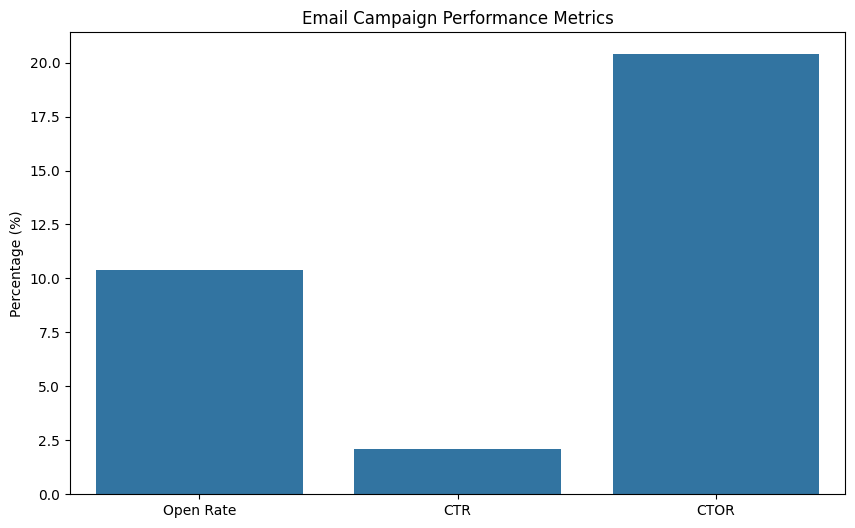

In [51]:
# Visualizing the above key performance metrics
metrics = ['Open Rate', 'CTR', 'CTOR']
values = [open_rate, ctr, ctor]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values)
plt.title('Email Campaign Performance Metrics')
plt.ylabel('Percentage (%)')
plt.savefig('visualizations/email_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

### EDA

In [57]:
df = email_table.copy()
df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked,hour_category,purchase_category
0,85120,short_email,personalized,2,Sunday,US,5,0,0,Night (0-6),4-5
1,966622,long_email,personalized,12,Sunday,UK,2,1,1,Morning (6-12),2-3
2,777221,long_email,personalized,11,Wednesday,US,2,0,0,Morning (6-12),2-3
3,493711,short_email,generic,6,Monday,UK,1,0,0,Night (0-6),1
4,106887,long_email,generic,14,Monday,US,6,0,0,Afternoon (12-18),6+


In [58]:
print("Total unique email_id :",df['email_id'].nunique())
print("Shape of df before dropping email_id : ",df.shape)

# NOTE : We can drop email_id column as it is not useful for analysis
df.drop(columns=['email_id'], inplace=True)

print("Shape of df after dropping email_id : ",df.shape)

Total unique email_id : 100000
Shape of df before dropping email_id :  (100000, 11)
Shape of df after dropping email_id :  (100000, 10)


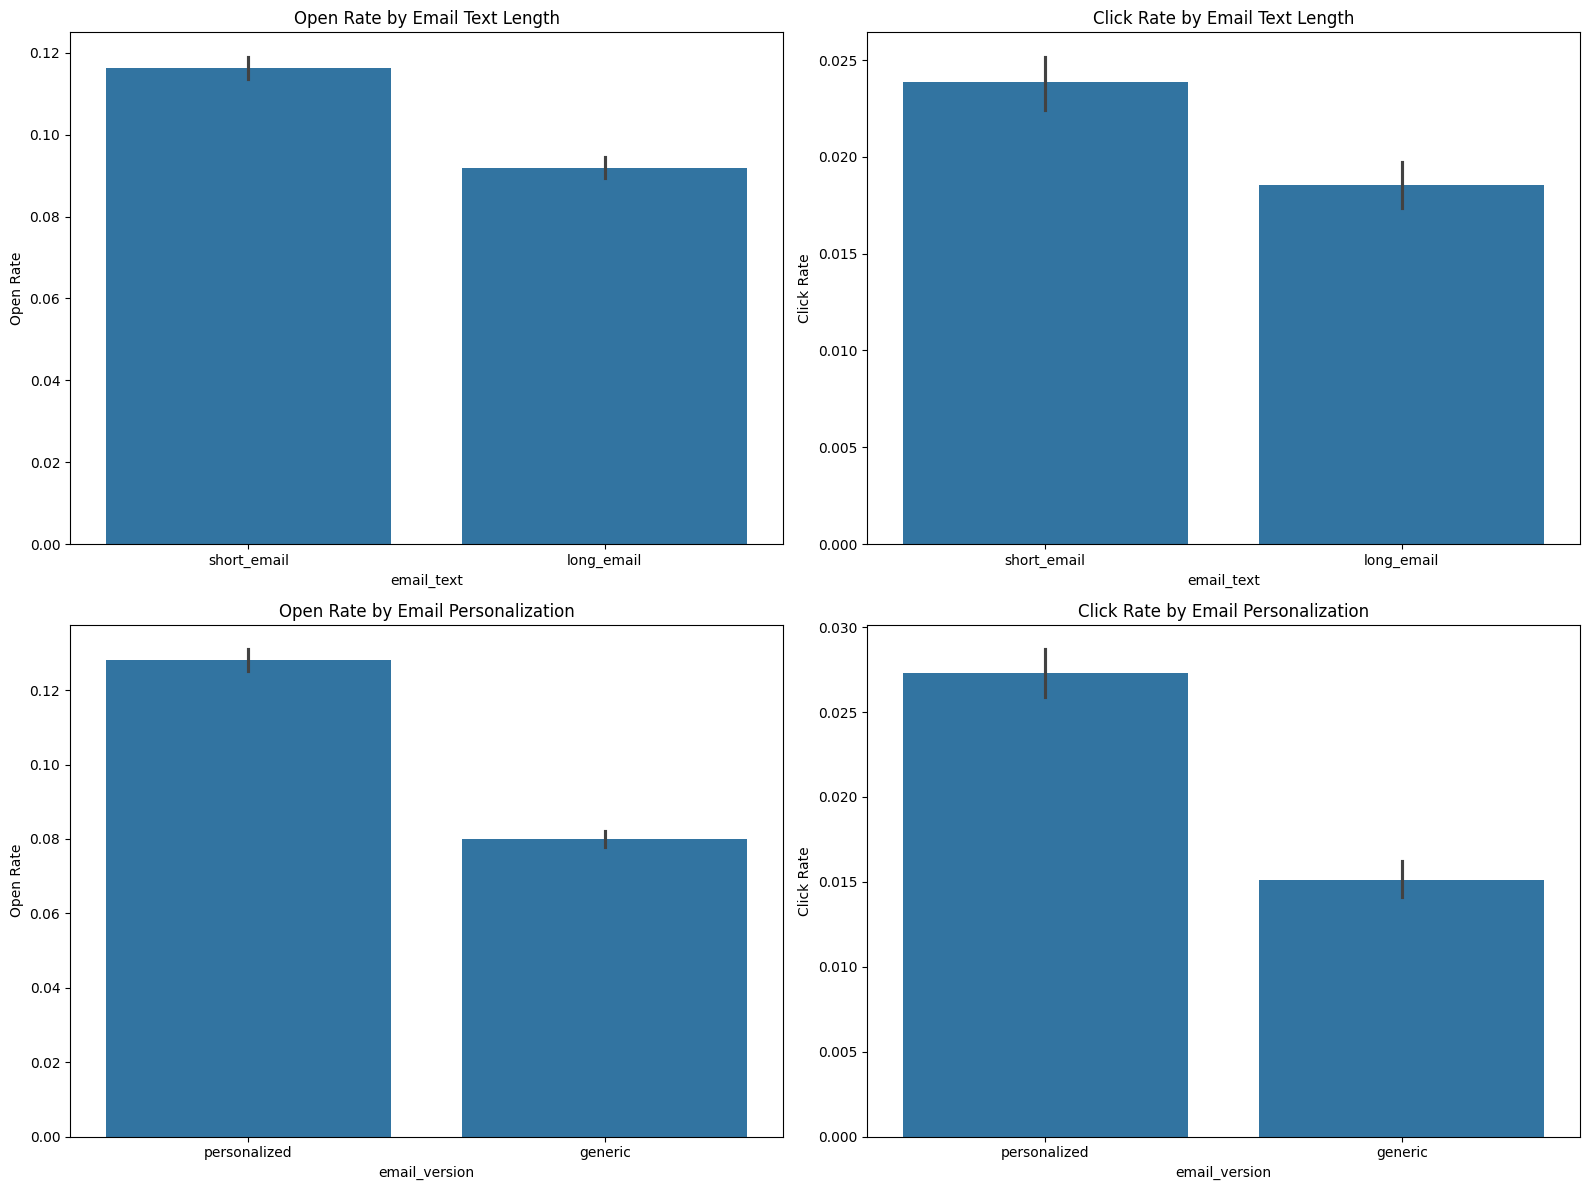

In [59]:
# Creating feature for hour of day category
email_table['hour_category'] = pd.cut(
    email_table['hour'], 
    bins=[0, 6, 12, 18, 24], 
    labels=['Night (0-6)', 'Morning (6-12)', 'Afternoon (12-18)', 'Evening (18-24)']
)

# 1. Analyze open and click rates by email characteristics
plt.figure(figsize=(16, 12))

# Email text length
plt.subplot(2, 2, 1)
sns.barplot(x='email_text', y='opened', data=email_table)
plt.title('Open Rate by Email Text Length')
plt.ylabel('Open Rate')

plt.subplot(2, 2, 2)
sns.barplot(x='email_text', y='clicked', data=email_table)
plt.title('Click Rate by Email Text Length')
plt.ylabel('Click Rate')

# Email personalization
plt.subplot(2, 2, 3)
sns.barplot(x='email_version', y='opened', data=email_table)
plt.title('Open Rate by Email Personalization')
plt.ylabel('Open Rate')

plt.subplot(2, 2, 4)
sns.barplot(x='email_version', y='clicked', data=email_table)
plt.title('Click Rate by Email Personalization')
plt.ylabel('Click Rate')

plt.tight_layout()
plt.savefig('visualizations/email_characteristics.png', dpi=300, bbox_inches='tight')
plt.show()



#### Insights & Interpretations
##### 1. Impact of Email Text Length
- Open Rate by Email Text Length
    - Short emails have a higher open rate than long emails.
    - Suggests that users might be more willing to engage when they perceive the email as concise or less time-consuming.
- Click Rate by Email Text Length
    - Similarly, click rates are higher for short emails.
    - Implies that not just open rates, but conversion is also better when email content is shorter.

Key Takeaway : Favor short, to-the-point email copies for better engagement and action.

##### 2. Impact of Email Personalization
- Open Rate by Email Personalization
    - Personalized emails significantly outperform generic emails in terms of open rate.
    - Shows that users are more likely to engage when the email feels tailored to them (e.g., name, purchase history, etc.).
- Click Rate by Email Personalization
    - Again, click rate is higher for personalized emails.
    - Personalization not only gets users to open but also encourages them to take the desired action.

Key Takeaway : Use personalization techniques (user name, behavior-based content) to boost both visibility and conversions.

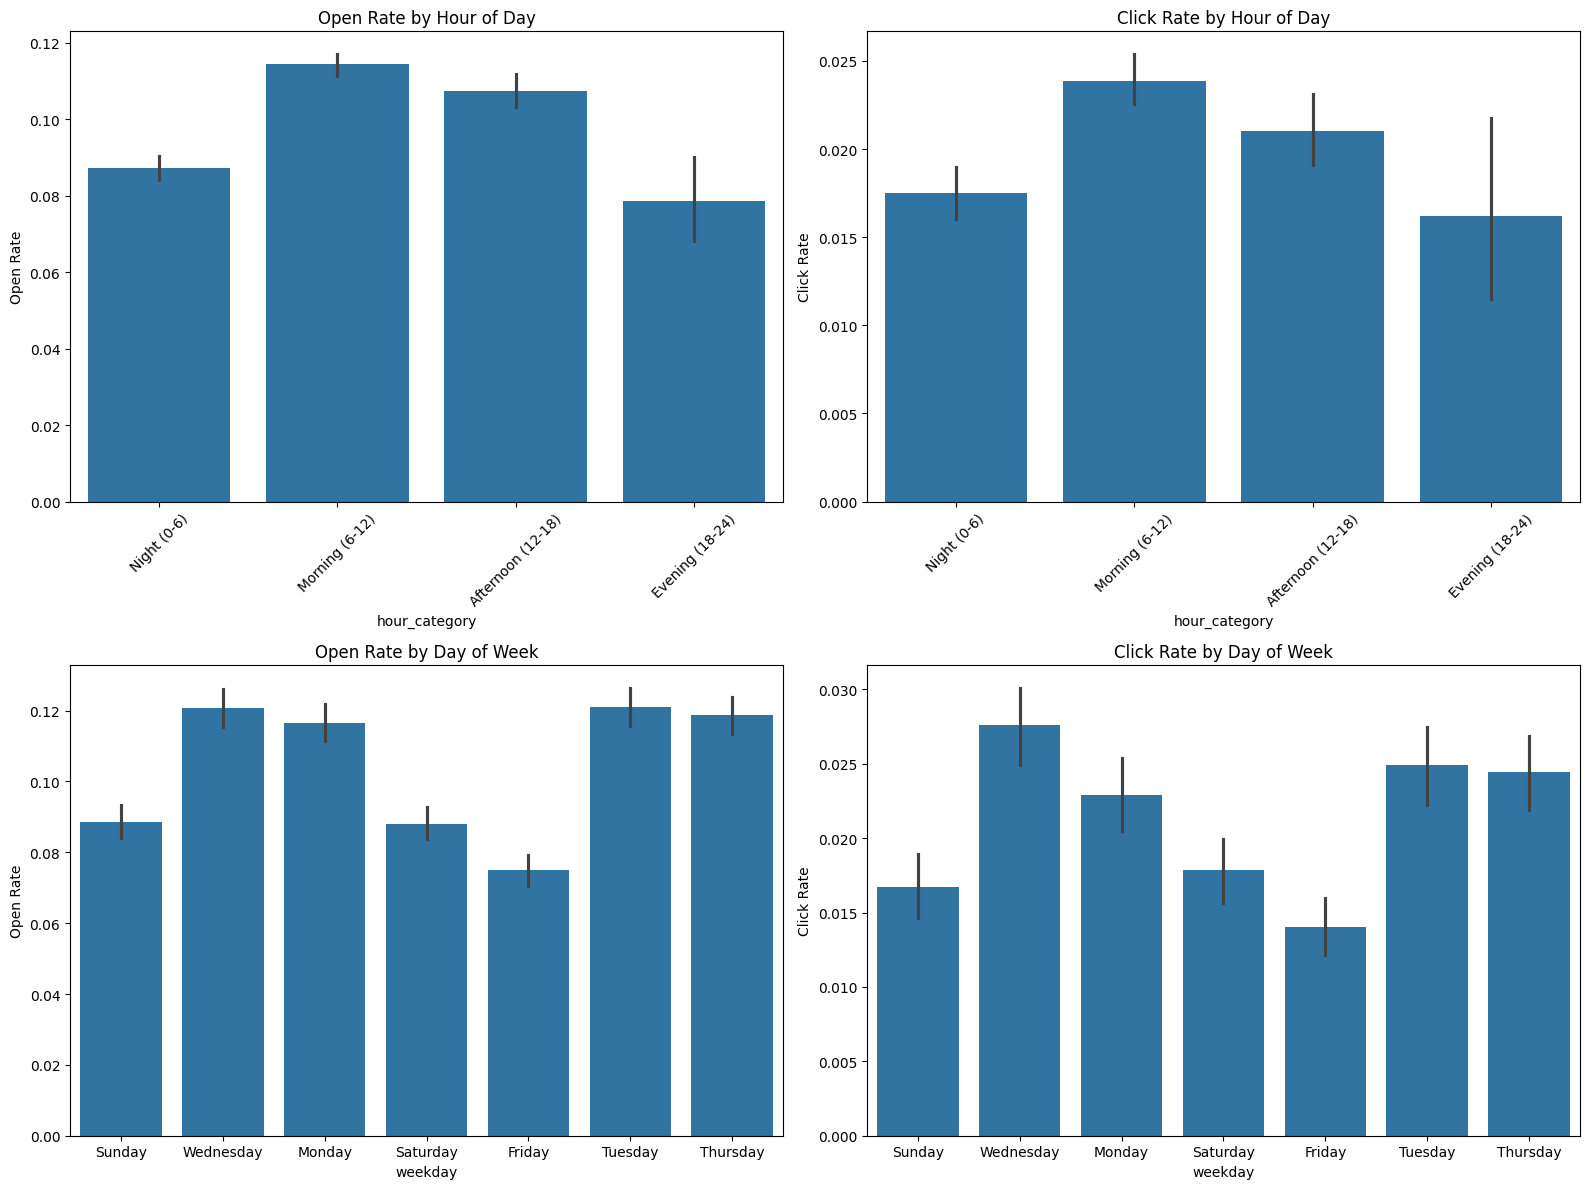

In [60]:
# 2. Analyze timing factors
plt.figure(figsize=(16, 12))

# Hour of day
plt.subplot(2, 2, 1)
sns.barplot(x='hour_category', y='opened', data=email_table)
plt.title('Open Rate by Hour of Day')
plt.ylabel('Open Rate')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.barplot(x='hour_category', y='clicked', data=email_table)
plt.title('Click Rate by Hour of Day')
plt.ylabel('Click Rate')
plt.xticks(rotation=45)

# Day of week
plt.subplot(2, 2, 3)
sns.barplot(x='weekday', y='opened', data=email_table)
plt.title('Open Rate by Day of Week')
plt.ylabel('Open Rate')

plt.subplot(2, 2, 4)
sns.barplot(x='weekday', y='clicked', data=email_table)
plt.title('Click Rate by Day of Week')
plt.ylabel('Click Rate')

plt.tight_layout()
plt.savefig('visualizations/timing_factors.png', dpi=300, bbox_inches='tight')
plt.show()

#### Insights & Interpretations
##### 1. Impact of Hour of Day on Engagement
- Open Rate by Hour of Day (Top-Left)
    - Morning (6–12) has the highest open rate, followed closely by Afternoon (12–18).
    - Evening (18–24) and Night (0–6) have lower open rates.
- Click Rate by Hour of Day (Top-Right)
    - Again, Morning (6–12) stands out with the highest click rate.
    - Afternoon (12–18) is decent, but clicks drop off in the evening and at night.

Key Takeaway : Sending emails in the morning yields the best performance for both open and click-through rates.

##### 2. Impact of Day of Week on Engagement
- Open Rate by Day of Week (Bottom-Left)
    - Tuesday, Wednesday, and Thursday show the highest open rates.
    - Friday and Saturday are the worst-performing days.
    - Sunday is mid-range.
- Click Rate by Day of Week (Bottom-Right)
    - Wednesday leads with the highest click rate, followed by Tuesday and Thursday.
    - Again, Friday and Saturday are poor performers.
    - Sunday lags in click rates even more than open rates.

Key Takeaway : Mid-week days (Tue–Thu) are best for engagement; avoid sending emails on weekends and Fridays.

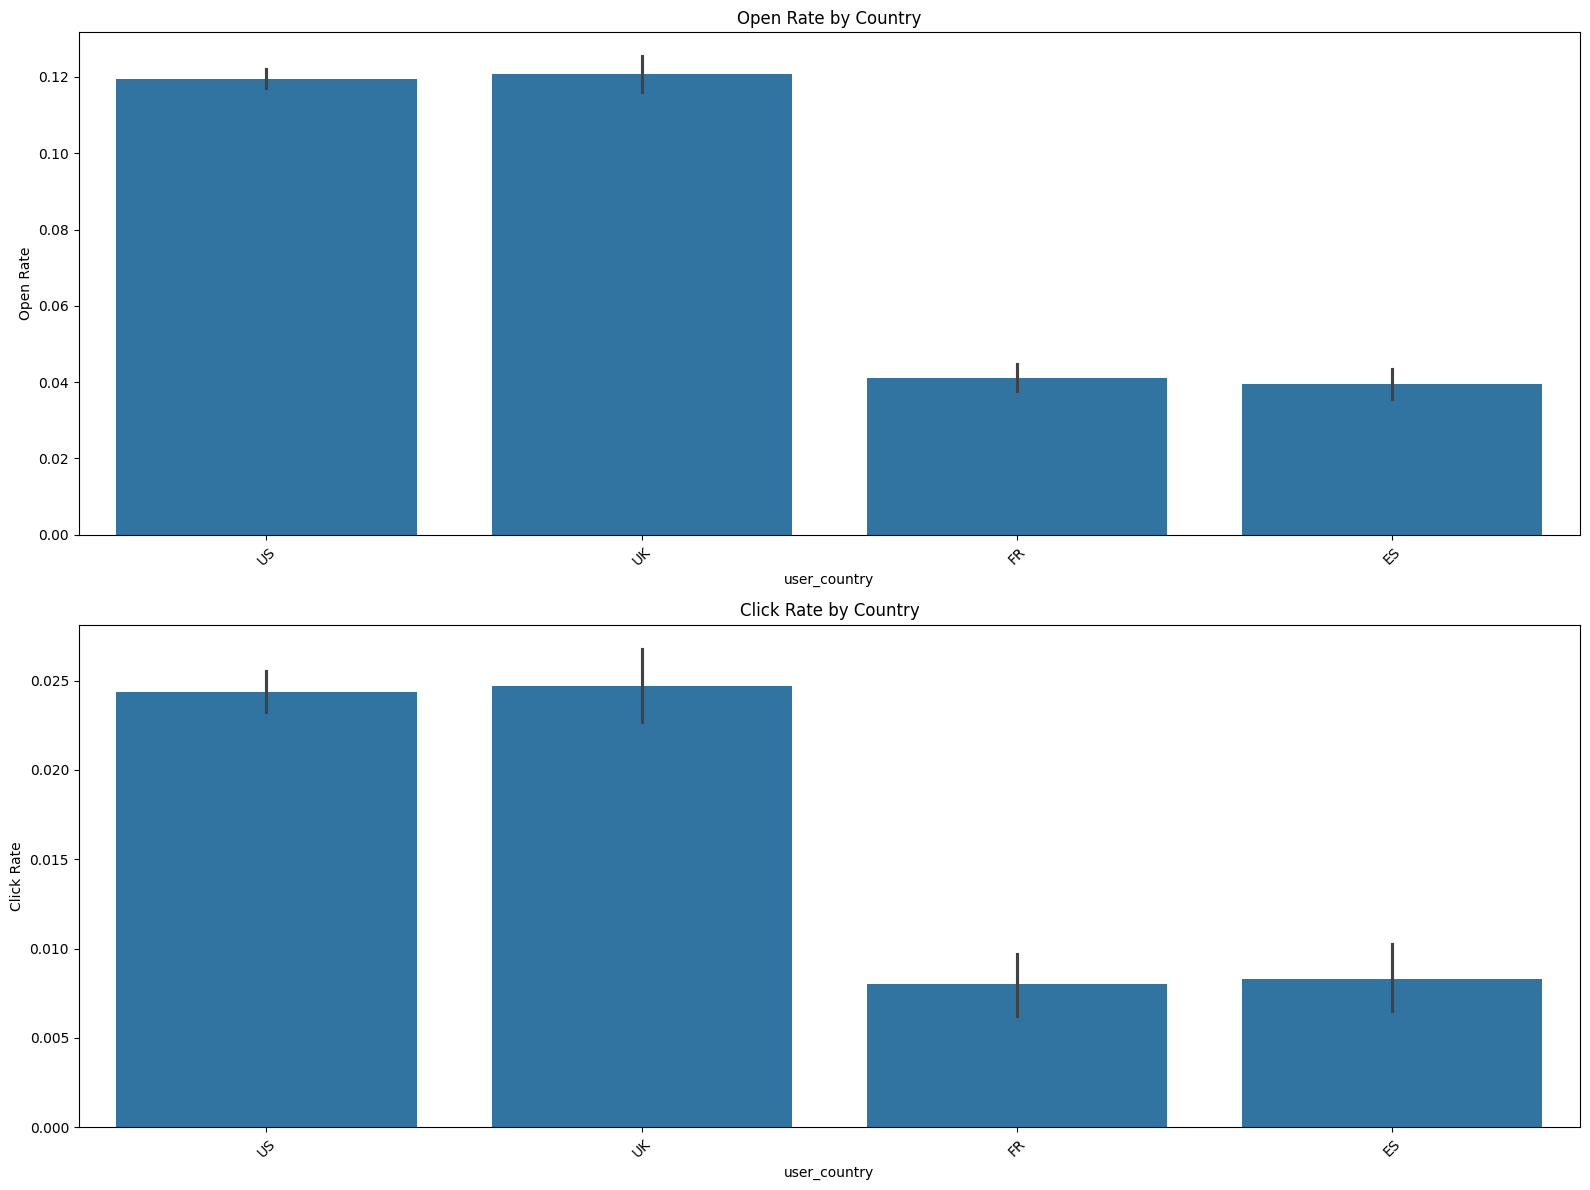

In [61]:
# 3. Analyze user characteristics
plt.figure(figsize=(16, 12))

# User country
top_countries = email_table['user_country'].value_counts().index
country_data = email_table[email_table['user_country'].isin(top_countries)]

plt.subplot(2, 1, 1)
sns.barplot(x='user_country', y='opened', data=country_data, order=top_countries)
plt.title('Open Rate by Country')
plt.ylabel('Open Rate')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
sns.barplot(x='user_country', y='clicked', data=country_data, order=top_countries)
plt.title('Click Rate by Country')
plt.ylabel('Click Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('visualizations/country_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

**Insights:**
- US & UK Lead in Both Open and Click Rates
  - Open Rate: US and UK are both close to 12%, clearly outperforming France and Spain (which hover around 4%)
  - Click Rate: US and UK again dominate with ~2.4%–2.5%, while France and Spain lag behind at ~0.8%
  
**Interpretation**:
- Email campaigns are more effective in English-speaking markets. These audiences are more likely to both open and engage with email content.

**Insights:**
- France & Spain Underperform
  - Open Rates are less than half of those in US/UK
  - Click Rates show a similar pattern.
  
**Interpretation:**
- Language mismatch (if emails are in English)
- Time zone mismatches in sending times

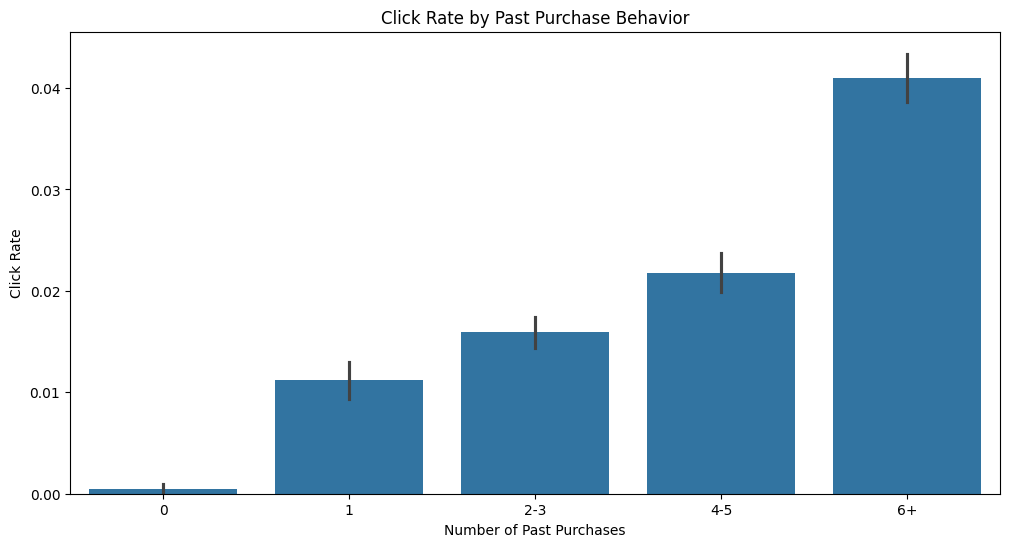

In [62]:
# 4. Analyze past purchase behavior
# Bin past purchases into categories
email_table['purchase_category'] = pd.cut(
    email_table['user_past_purchases'], 
    bins=[-1, 0, 1, 3, 5, float('inf')], 
    labels=['0', '1', '2-3', '4-5', '6+']
)

plt.figure(figsize=(12, 6))
sns.barplot(x='purchase_category', y='clicked', data=email_table)
plt.title('Click Rate by Past Purchase Behavior')
plt.xlabel('Number of Past Purchases')
plt.ylabel('Click Rate')
plt.savefig('visualizations/purchase_behavior.png', dpi=300, bbox_inches='tight')
plt.show()

#### Interpretations
- Trend of Click Rate by Past Purchase Behaviour
  - The click rate increases steadily with the number of past purchases.
  - It goes from nearly 0% for new/non-buyers (0 purchases) to over 4% for loyal/repeat buyers (6+ purchases).

#### Insights
- More Past Purchases → Higher Engagement
  - Past behavior is a strong predictor of future action. Retargeting customers with high numer of past purchases is likely to yield better results.
- Cold Users (0 purchases) need a different strategy:
  - Maybe they need more value upfront (e.g. discounts).
- Segment email campaigns Based on Purchase Behavior

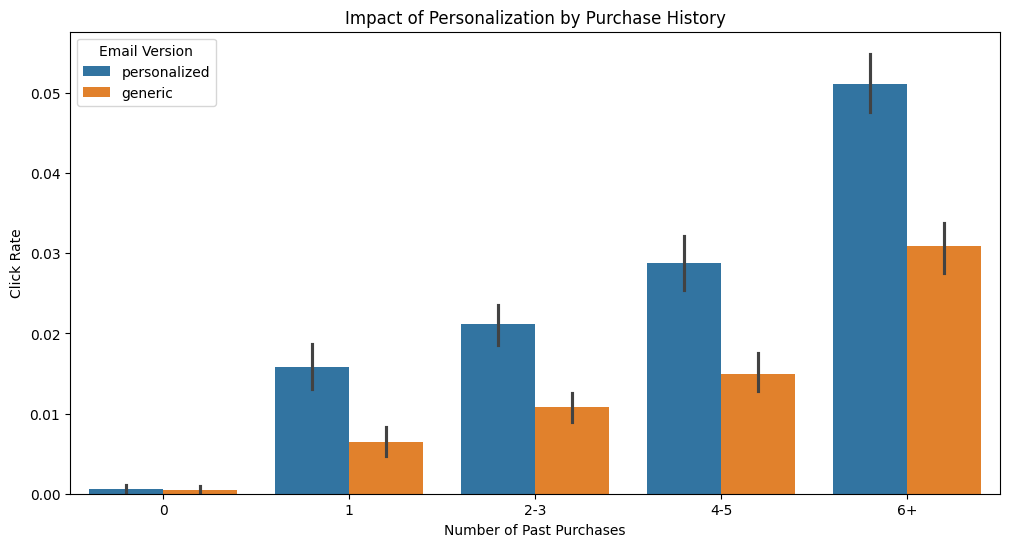

In [63]:
# 5. Interaction effects (example: personalization by purchase history)
plt.figure(figsize=(12, 6))
sns.barplot(x='purchase_category', y='clicked', hue='email_version', data=email_table)
plt.title('Impact of Personalization by Purchase History')
plt.xlabel('Number of Past Purchases')
plt.ylabel('Click Rate')
plt.legend(title='Email Version')
plt.savefig('visualizations/personalization_by_purchase.png', dpi=300, bbox_inches='tight')
plt.show()

#### Insights & Interpretations

- Personalization Significantly Outperforms Generic Emails
  - Across all segments (except 0 purchases), personalized emails have consistently higher click rates than generic ones.
- Click Rate Grows with Purchase History for Both Email Types
  - Similar to the previous chart, the more someone has purchased in the past, the more likely they are to click again.

- Segmentation Strategy
  - Cold Users (0 purchases): Personalization doesn’t make a big difference → focus on awareness + free value.
  - Mid-tier (1–3 purchases): Begin tailored messaging with lighter personalization.
  - High-tier (4+ purchases): Invest heavily in personalization, maybe even custom journeys.